In [1]:
%config Completer.use_jedi = False

In [17]:
import pandas as pd
from collections import Counter

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
train = pd.read_csv("./store-sales-time-series-forecasting/train.csv")

In [28]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [10]:
categorical_features = ["family", "store_nbr"]
categorical_transformer = OneHotEncoder()

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [30]:
train_preprocess = preprocessor.fit_transform(train)

In [32]:
train_preprocess.toarray().shape

(3000888, 87)

In [10]:
oil = pd.read_csv("./store-sales-time-series-forecasting/oil.csv")

In [11]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [16]:
store = pd.read_csv("./store-sales-time-series-forecasting/stores.csv")
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [17]:
pd.read_csv("./store-sales-time-series-forecasting/transactions.csv")

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


<b>store_nbr</b> 어떤 상품이 팔린 상점의 식별

<b>family</b> 상품의 종류 식별

<b>sales</b> 특정 날짜에 특정 상점에서 제품군의 총 매출.

<b>onpromotion</b> 지정된 날짜에 상점에서 프로모션 중인 제품군의 총 항목 수를 제공.

In [19]:
from collections import Counter

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'store_nbr'}>],
       [<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'onpromotion'}>]], dtype=object)

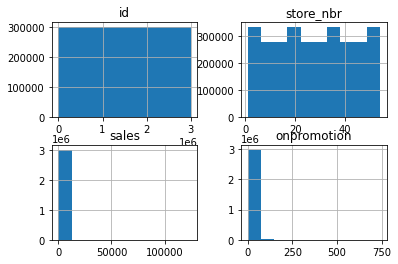

In [22]:
train.hist()

In [19]:
print("family 개수 : ", len(Counter(train['family'])))

for a, b in Counter(train['family']).items():
    print("{0:30} {1}".format(a, b))

family 개수 :  33
AUTOMOTIVE                     90936
BABY CARE                      90936
BEAUTY                         90936
BEVERAGES                      90936
BOOKS                          90936
BREAD/BAKERY                   90936
CELEBRATION                    90936
CLEANING                       90936
DAIRY                          90936
DELI                           90936
EGGS                           90936
FROZEN FOODS                   90936
GROCERY I                      90936
GROCERY II                     90936
HARDWARE                       90936
HOME AND KITCHEN I             90936
HOME AND KITCHEN II            90936
HOME APPLIANCES                90936
HOME CARE                      90936
LADIESWEAR                     90936
LAWN AND GARDEN                90936
LINGERIE                       90936
LIQUOR,WINE,BEER               90936
MAGAZINES                      90936
MEATS                          90936
PERSONAL CARE                  90936
PET SUPPLIES          

In [20]:
len(Counter(train['store_nbr']))

54

In [29]:
len(Counter(train['store_nbr']))

54

In [26]:
store

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15
